In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel, chi2_contingency, f_oneway
%matplotlib inline
plt.rc('figure', figsize=(10, 6))
from matplotlib import rcParams
rcParams['font.family'] = 'New Gulim'
rcParams['font.size'] = 10
rcParams['axes.unicode_minus'] = False

# 가설
대한민국 남성의 평균 몸무게는 70 킬로그램이다.

### 1. 가설 수립
H0: 대한민국 남성의 평균 몸무게는 70킬로그램이다(차이가 없다.)
H1: 대한민국 남성의 평균 몸무게는 70킬로그램이 아니다.

### 2. 통계량 산출- 데이터 수집 

In [4]:
np.random.seed(123) # 데이터 수집 대신 임의의 값

weight = np.random.uniform(40, 100, 100)

test_result = ttest_1samp(weight, 70)
print(f"평균 : {np.mean(weight)}")
print(f"p-value : {test_result.pvalue}")

평균 : 70.08573280308887
p-value : 0.953913826658112


### 3. 검정결과

In [5]:
print(f"검정 결과 : {'귀무가설 기각' if test_result.pvalue < 0.05 else '귀무가설 채택'}")

검정 결과 : 귀무가설 채택


### 4. 결과 채택

In [6]:
if test_result.pvalue < 0.05:
    print("대한민국 남성의 평균 몸무게는 70kg 이 아니다.")
else:
    print("대한민국 남성의 평균 몸무게는 70kg 이다.")

대한민국 남성의 평균 몸무게는 70kg 이다.


# 여기 까지가 가설 검정의 한 흐름
------------


# 예제 1
문제: 하루 커피 섭취량이 평균 2.5잔이라고 알려져 있다. 실제 설문조사에서 2.8잔이 나왔다. 과연 차이가 통계적으로 유의한가?

In [13]:
# 표본 데이터 (30명)
coffee_data = [2.9, 2.4, 2.7, 3.0, 2.6, 2.8, 2.9, 3.1, 2.7, 2.6,
               2.8, 2.5, 3.2, 3.0, 2.4, 2.6, 2.7, 3.1, 2.8, 2.7,
               2.5, 2.9, 2.6, 2.8, 2.9, 2.5, 2.7, 2.8, 3.0, 2.9]

# 단일표본 t-검정
t_stat, p_value = ttest_1samp(coffee_data, popmean=2.5)

print(f"t값 = {t_stat:.3f}, p값 = {p_value:.6f}")

t값 = 7.031, p값 = 0.000000


### 예제 2: 두 그룹 비교 - 이표본(독립표본) t검정

**문제:** A와 B 수업의 시험 평균 점수가 차이가 있는가?

In [12]:
group_A = [78, 85, 82, 88, 76, 81, 79, 84, 82, 80]
group_B = [72, 75, 78, 74, 71, 77, 70, 76, 75, 73]

t_stat, p_value = ttest_ind(group_A, group_B, equal_var=False)
print(f"t값 = {t_stat:.3f}, p값 = {p_value:.6f}")

t값 = 5.331, p값 = 0.000060


### 대응표본 T 검정

In [9]:
# 대응 표본 t-검정 예제: 약물 투여 전후 혈압 비교
before = [120, 122, 143, 130, 135, 118, 127, 140, 132, 125]
after = [115, 117, 138, 125, 129, 112, 120, 135, 126, 119]

t_stat, p_value = ttest_rel(before, after)
print(f"t값 = {t_stat:.3f}, p값 = {p_value:.10f}")

t값 = 25.327, p값 = 0.0000000011


H0: 약물 투여 시 혈압에 차이가 없을 것이다.   
H1: 약물 투여 시 혈압에 차이가 있을 것이다.

t값 = 25.327, p값 = 0.0000000011

귀무가설을 기각한다.   
약물을 투여하면 전후 차이가 있다.

### 카이제곱
문제: 성별에 따라 커피를 더 선호하는지?

In [14]:
import numpy as np
obs = np.array([[40, 10],  # 남자 (좋아함, 안좋아함) 교차표
                [30, 20]]) # 여자

chi2, p, dof, expected = chi2_contingency(obs)
print(f"chi2 = {chi2:.3f}, p값 = {p:.6f}")

chi2 = 3.857, p값 = 0.049535


H0: 성별에 따라 커피를 더 선호하는 경향이 없을 것이다.   
H1: 성별에 따라 커피를 더 선호하는 경향이 있을 것이다.

귀무가설을 채택한다.   
성별에 따라 커피를 더 선호하는 경향이 있다.

### ANOVA

In [11]:
from scipy.stats import f_oneway

# 세 그룹의 점수
group1 = [80, 85, 90]
group2 = [70, 75, 78]
group3 = [60, 65, 62]

f_stat, p_value = f_oneway(group1, group2, group3)
print(f"F값: {f_stat:.2f}, p값: {p_value:.4f}")

F값: 24.28, p값: 0.0013


### 베이즈의 정리

In [ ]:
P_A = 0.1                   # 암일 확률
P_not_A = 1 - P_A           # 암이 아닐 확률

P_B_given_A = 0.95          # 양성판정의 정확도
P_B_given_not_A = 0.05      # 암이 아닌데 양성 판정일 확률


# 베이즈의 정리
P_A_given_B =  P_B_given_A * P_A / ( (P_B_given_A * P_A) + (P_B_given_not_A * P_not_A) )

print(P_A_given_B)

0.6785714285714285


### 확률의 계산

In [17]:
# 동전 던지기

coin_space = ['front', 'back']
coin_event = ['front']

prob = lambda e, s: len(e) / len(s)
prob(coin_event, coin_space)

0.5

In [19]:
# 주사위 던지기
# 주사위를 1번 던졌을 때 3 이 나올 확률
dice_space = [i for i in range(1, 7)]
dice_event = [3]

prob(dice_event, dice_space)

0.16666666666666666

In [24]:
space = {1, 2, 3, 4, 5, 6}
event_a = {2, 4, 6}
event_b = {5, 6}

# 합집합
union_a = event_a | event_b
print(union_a)

{2, 4, 5, 6}


In [26]:
cnt_union = len(union_a)
cnt_all = len(space)

a = cnt_union / cnt_all
# 짝수 또는 4보다 큰 눈이 나올 확률
a

0.6666666666666666

In [28]:
# 2이하이거나 5이상인 눈이 나올 확률
under_2 = {1, 2}
over_5 = {5, 6}

union_b = under_2|over_5
b = len(union_b) / len(space)

b

0.6666666666666666

### 교집합

In [31]:
# 주사위를 던저 짝수 이면서 2 일 확률
event_a = {2, 4, 6}
event_b = {2}

P_A = len(event_a) / len(space)
P_B = len(event_b) / len(space)

P_BnA = event_a & event_b
P_BnA

{2}

In [36]:
c = len(P_BnA) / len(space)

c

0.16666666666666666

In [39]:
P_B_given_A = P_BnA / P_A
P_B_given_A

TypeError: unsupported operand type(s) for /: 'set' and 'float'

### 우도와 확률값

In [57]:
# 동전 10번 던져서 8번 앞면이 나왔다.
# 이 경우 우도의 계산
from scipy.stats import binom, norm

In [52]:
n = 10
k = 8

# 가설1 공전한 동전 일 것이다.
p1 = 0.5
p1_likelihood = binom.pmf(k, n, p1)     # 조건, 총 사건, 확률

# 가설2 앞면이 공정하지 못한 동전 일 것이다.
p2 = 0.8
p2_likelihood = binom.pmf(k, n, p2)

print(p1_likelihood)
print(p2_likelihood)

0.04394531250000004
0.30198988799999993


가설1: 앞면이 8번 나올 확률은 4.4%   
가설2: 앞면이 8번 나올 확률은 30.2%   

앞면이 8번 나오는 관측값은 p=0.8인 모델이 더 잘 설명한다. (우도가 더 크다.)

---
### 기대값
x의 확률들의 평균

In [55]:
x_val = [1, 2, 3]
p_x = [1/6, 3/6, 2/6]

exp_val = 0
for i, j in zip(x_val, p_x):
    exp_val += i * j


print(f'기댓값: {exp_val:.6f}')

기댓값: 2.166667


### 정규분포

In [60]:
mean = 0
sig = 1

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, loc=mean, scale=sig)

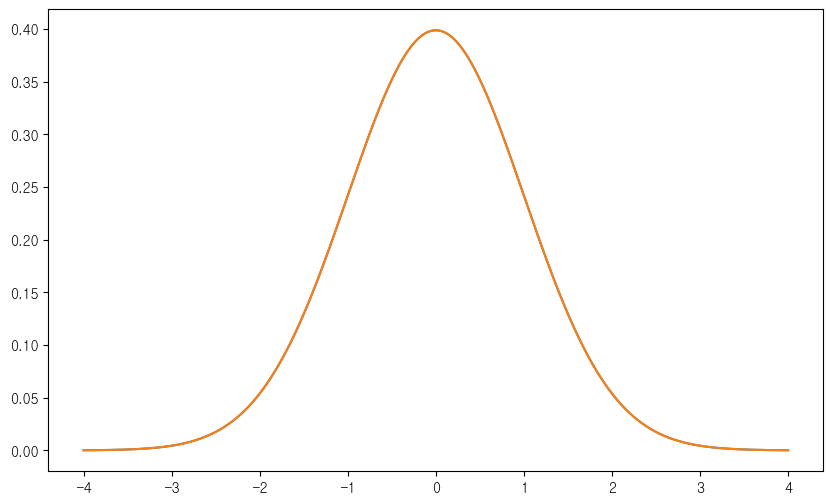

In [62]:
plt.plot(x, y)
plt.show()

### 표집분포

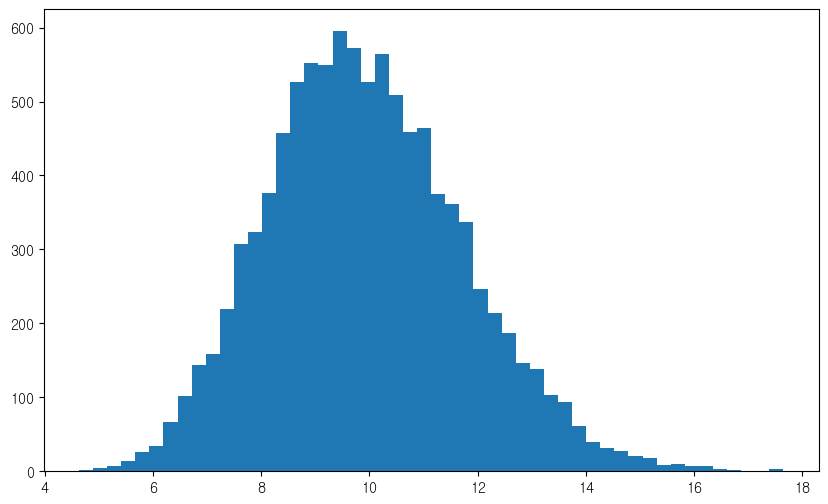

In [78]:
np.random.seed(0)
x_pop = np.random.exponential(scale=10, size=10000)
sample_mean = [np.mean(np.random.choice(x_pop, 30)) for _ in range(10000)]

plt.hist(sample_mean, bins=50)
plt.show()

### z점수

In [79]:
mean = 100
sig = 10

x1 = 110
x2 = 125

z_x1 = (x1-mean) / sig
z_x2 = (x2-mean) / sig

print(z_x1)
print(z_x2)

1.0
2.5


In [ ]:
print(norm.cdf(z_x1) - norm.cdf(0))
print(norm.cdf(z_x2) - norm.cdf(0))
print(-(norm.cdf(z_x1) - norm.cdf(0)) + (norm.cdf(z_x2) - norm.cdf(0)))

0.3413447460685429
0.49379033467422384
0.15244558860568092


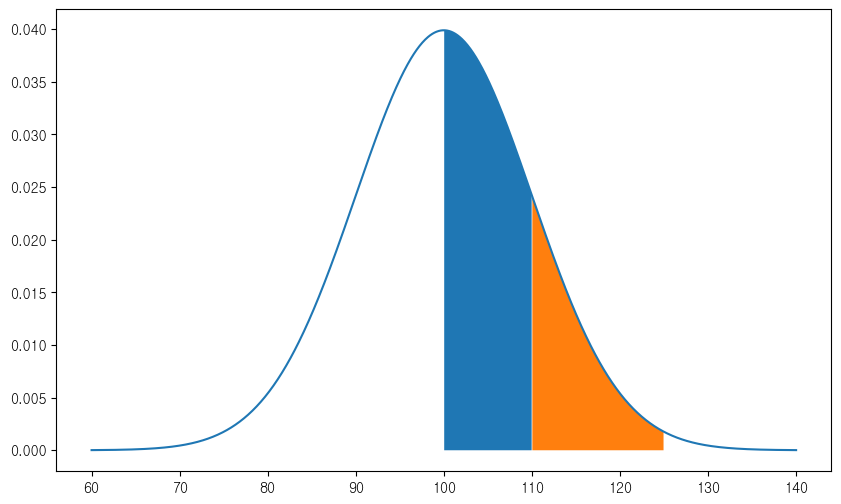

In [96]:
x = np.linspace(mean - 4 * sig, mean + 4 * sig, 1000)
y = norm.pdf(x, mean, sig)

plt.plot(x, y)

plt.fill_between(x, y, where=(x>100)&(x<=110))
plt.fill_between(x, y, where=(x>110)&(x<=125))

plt.show()